<a href="https://colab.research.google.com/github/ppseguel/jobskillmatching/blob/master/industry_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install git+http://github.com/scikit-learn/scikit-learn.git


  Cloning http://github.com/scikit-learn/scikit-learn.git to /tmp/pip-req-build-y4ljw1b8
  Running command git clone -q http://github.com/scikit-learn/scikit-learn.git /tmp/pip-req-build-y4ljw1b8
ERROR: Operation cancelled by user


In [0]:
#!pip install -q skmultilearn.adapt
!pip install scikit-multilearn



In [0]:
#import dataset
#follow this documentation, using Github, https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

import pandas as pd

url = 'https://raw.githubusercontent.com/ppseguel/jobskillmatching/master/marketingintern_industry.csv'
job_data = pd.read_csv(url)
#job_data = pd.read_csv(url, sep=',').values
#job_data = pd.DataFrame(job_data)
#job_data = job_data.values

#filling blank cells
df = pd.DataFrame(job_data)
df1 = df.fillna(0)

df1.columns
df1 = df1.rename(columns={"Unnamed: 0": "id", "Linkedin/bloomberg":"LinkedInBloomerg"})




In [0]:
#Checking the dataset
#print(job_data)
#print(df1)
#df1.head()
#job_data.head()

#print(job_data.Groups, job_data.tableau)


In [0]:
#EXPERIMENT 1 (EDIT DATASET)

# 1. Construct Datasets for Training and Evaluation
#selecting y and x variables

#splitting the dataset into the source variables (independant variables) and the target variable (dependant variable)
#sourcevars = d[["agr","art"] #all columns except the last one
#targetvar = df[1] #only the last column

sourcevars = df1[df1.columns[-31:-1]] # Remember, Python is 0-offset! The "3rd" entry is at slot 2.           
targetvar = df1[df1.columns[1:18]] # Remember, Python is 0-offset! The "3rd" entry is at slot 2.
               
X = sourcevars
y = targetvar

#y_names = targetvar.names

#targetvar.head()
#print(y)
#print(X)

In [168]:
# b) Construct Datasets for Training and Evaluation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print("Number samples in training: ", len(X_train))
print("Number samples in testing: ", len(X_test))


Number samples in training:  514
Number samples in testing:  172


In [0]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [186]:
#a) Decision Tree Classifier
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
#tree_giniIndex = ClassifierChain(DecisionTreeClassifier(criterion='entropy', max_depth=15))
tree_giniIndex = LabelPowerset(DecisionTreeClassifier(criterion='entropy', max_depth=15))

#tree_giniIndex2 = DecisionTreeClassifier(criterion='entropy', max_depth=15, class_weight="balanced")


# train
tree_giniIndex.fit(X_train_norm, y_train)
#tree_giniIndex2.fit(X_train_norm, y_train)

# predict
y_predict_DT = tree_giniIndex.predict(X_test_norm)
#y_predict_DT2 = tree_giniIndex2.predict(X_test)


accuracy_DT = accuracy_score(y_test,y_predict_DT)
print("Accuracy:", accuracy_DT)

f1_score_DT = f1_score(y_test,y_predict_DT, average=None)
print("F1 per sample:", f1_score_DT)

f1_score_DT_micro = f1_score(y_test,y_predict_DT, average="micro")
print("F1_micro:", f1_score_DT_micro)

f1_score_DT_macro = f1_score(y_test,y_predict_DT, average="macro")
print("F1_macro:",f1_score_DT_macro)

#f1_score_DT = f1_score(y_test,y_predict_DT, average="binary")

#f1_score_DT2 = f1_score(y_test,y_predict_DT2, average=None)
#f1_score_DT2 = f1_score(y_test,y_predict_DT2, average="weighted")

#roc1 = roc_auc_score(y_test,y_predict_DT)
#roc2 = roc_auc_score(y_test,y_predict_DT2)

#print(f1_score_DT2)

#print(roc1)
#print(roc2)



Accuracy: 0.19767441860465115
F1 per sample: [0.   0.   0.26 0.32 0.   0.23 0.29 0.29 0.09 0.   0.31 0.3  0.21 0.12
 0.07 0.22 0.15]
F1_micro: 0.2379182156133829
F1_macro: 0.1676398140034514


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [184]:
#EXPERIMENT 1 (EDIT DATASET AND TO MULTILABEL)

# a) Train and evaluate a decision treel model

# using classifier chains
#from skmultilearn.problem_transform import ClassifierChain
#from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
#from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
#tree_giniIndex = ClassifierChain(DecisionTreeClassifier(criterion='gini', max_depth=6, class_weight="balanced"))
#tree_giniIndex = BinaryRelevance(DecisionTreeClassifier(criterion='gini', max_depth=6, class_weight="balanced"))
#tree_giniIndex = LabelPowerset(DecisionTreeClassifier(criterion='gini', max_depth=6, class_weight="balanced"))

# train
#tree_giniIndex.fit(X_train, y_train)


#normalization

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


# Perform 10-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=2)
tree_scores = cross_val_score(tree_giniIndex, X, y, cv=kfold, scoring="f1_micro")
print("Cross-validation score:\n{}".format(tree_scores))
print("Average cross-validation score: {:.2f}".format(tree_scores.mean()))
print("Standard deviation: {:.2f}".format(tree_scores.std()))

# Tune Decision Tree hyperparameter using cross-validation
best_score = 0
for max_d in [1,2,3,4,5,6,7,8,9,11,13,15,17,18,19]:
    
    #tree_giniIndex = ClassifierChain(DecisionTreeClassifier(criterion='gini', max_depth=max_d, class_weight="balanced").fit(X_train_norm, y_train))
    #tree_giniIndex = BinaryRelevance(DecisionTreeClassifier(max_depth=max_d).fit(X_train_norm, y_train))
    #tree_giniIndex = LabelPowerset(DecisionTreeClassifier(max_depth=max_d).fit(X_train_norm, y_train))
    #tree_giniIndex = LabelPowerset(DecisionTreeClassifier(criterion='entropy', max_depth=max_d, class_weight="balanced").fit(X_train_norm, y_train))
    tree_giniIndex = LabelPowerset(DecisionTreeClassifier(criterion='entropy', max_depth=max_d).fit(X_train_norm, y_train))

    fold_accuracies = cross_val_score(tree_giniIndex, X_train_norm, y_train, cv=kfold, scoring="f1_micro") 
    score = fold_accuracies.mean()
    
    print("Score for depth of " + str(max_d) + "on validation set is {:0.2f}".format(score))
    
    #Best score for best optimal model
    
    if score > best_score:
        best_param = {'max_depth': max_d}
        best_score = score
        
#Part of the answer of question 3        
tree_giniIndex = DecisionTreeClassifier(**best_param)
tree_giniIndex.fit(X_train_norm, y_train)
test_score = tree_giniIndex.score(X_test_norm, y_test)
print("Best score on cross-validation: {:0.2f}".format(best_score))
print("Best parameters: {}".format(best_param))
print("Test set score: {:.2f}".format(test_score))


Cross-validation score:
[0.21 0.31 0.32 0.25 0.26 0.29 0.25 0.3  0.27 0.17]
Average cross-validation score: 0.26
Standard deviation: 0.04
Score for depth of 1on validation set is 0.14
Score for depth of 2on validation set is 0.17
Score for depth of 3on validation set is 0.16
Score for depth of 4on validation set is 0.19
Score for depth of 5on validation set is 0.19
Score for depth of 6on validation set is 0.18
Score for depth of 7on validation set is 0.18
Score for depth of 8on validation set is 0.18
Score for depth of 9on validation set is 0.20
Score for depth of 11on validation set is 0.22
Score for depth of 13on validation set is 0.23
Score for depth of 15on validation set is 0.23
Score for depth of 17on validation set is 0.23
Score for depth of 18on validation set is 0.23
Score for depth of 19on validation set is 0.22
Best score on cross-validation: 0.23
Best parameters: {'max_depth': 15}
Test set score: 0.17


In [196]:
#b) KneighborsClassifier
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


#normalization

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
#Knclassifier = ClassifierChain(KNeighborsClassifier(n_neighbors=1, p =1, metric="minkowski"))
Knclassifier = LabelPowerset(KNeighborsClassifier(n_neighbors=1, p =1, metric="minkowski"))

# train
Knclassifier1 =Knclassifier.fit(X_train_norm, y_train)

# predict
y_predict_KN = Knclassifier1.predict(X_test_norm)

accuracy_KN= accuracy_score(y_test,y_predict_KN)

f1_score_KN= f1_score(y_test,y_predict_KN, average=None)

f1_score_KN_micro= f1_score(y_test,y_predict_KN, average="micro")
f1_score_KN_macro= f1_score(y_test,y_predict_KN, average="macro")


print("Accuracy:",accuracy_KN)
print("f1 score per sample:",f1_score_KN)
print("f1score_micro",f1_score_KN_micro)
print("f1score_macro",f1_score_KN_macro)


Accuracy: 0.22674418604651161
f1 score per sample: [0.   0.   0.36 0.28 0.   0.33 0.17 0.35 0.12 0.   0.33 0.35 0.17 0.15
 0.21 0.31 0.17]
f1score_micro 0.263653483992467
f1score_macro 0.19462238010200328


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [195]:
#2(b) K-Nearest Neighbors


#from skmultilearn.problem_transform import ClassifierChain
#from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

#training_accuracy = []
#test_accuracy = []
knn_best_score=0
neighbor_settings = range(1, 11)
distance_metrics = range(1, 3)
for n_neighbors in neighbor_settings:
    for p in distance_metrics:
        #knn_clf = ClassifierChain(KNeighborsClassifier(n_neighbors=n_neighbors, p=p))
        #knn_clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=n_neighbors, p=p))
        knn_clf = LabelPowerset(KNeighborsClassifier(n_neighbors=n_neighbors, p=p, metric="minkowski"))
        fold_accuracies = cross_val_score(knn_clf, X_train_norm, y_train, cv=kfold, scoring="f1_micro")
        score = fold_accuracies.mean()
        if score > knn_best_score: 
            knn_best_score = score
            knn_clf_best_parameters={'n_neighbors': n_neighbors,'p': p}
        

print("Average cross-validation score: {:.10f}".format(knn_best_score))
print("Best parameter:", knn_clf_best_parameters)

Average cross-validation score: 0.2559932432
Best parameter: {'n_neighbors': 1, 'p': 1}


In [58]:
#3 Optimal Decision Tree model predictive performance
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

tree_giniIndex = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree_giniIndex.fit(X_train, y_train)

y_predictedDT = tree_giniIndex.predict(X_test_scaled)
print(metrics.classification_report(y_predictedDT, y_test))
print(metrics.accuracy_score(y_predictedDT, y_test))

#3 Optimal SVM model predictive performance
from sklearn import metrics
from sklearn.svm import SVC

poly_kernel_svm_clf = SVC(kernel="poly", C = 1, degree=0, gamma=0.1)
poly_kernel_svm_clf.fit(X_train_scaled, y_train)
y_predictedSVM = poly_kernel_svm_clf.predict(X_test_scaled)
print(metrics.classification_report(y_predictedSVM, y_test))
print(metrics.accuracy_score(y_predictedSVM, y_test))


NameError: ignored

In [0]:
# Visualize confusion matrix for the Naive Bayes
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

mat = confusion_matrix(y_predictedNB, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Visualize confusion matrix for Decision Tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

mat = confusion_matrix(y_predictedDT, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Visualize confusion matrix for the SVM
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

mat = confusion_matrix(y_predictedSVM, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

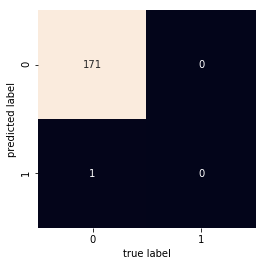

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix


mat = np.array([[171,1], [0,0]])
       
#mat = np.array([[1, 0],[0, 1]])       
       
#mat = multilabel_confusion_matrix(y_test, y_predict_DT, sample_weight=None, samplewise=False)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')






In [56]:
#MULTILABEL CONFUSION MATRIX
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix


#multilabel_confusion_matrix(y_true, y_pred, sample_weight=None, labels=None, samplewise=False)
cm = multilabel_confusion_matrix(y_test, y_predict_DT, sample_weight=None, samplewise=False)

print(cm)

#[[TN, FP], 
# [FN,TP]], ith True on the left (Neg, Pos) and predict on the top (Neg, Pos)

#f1_score_DT = f1_score(y_test,y_predict_DT, average=None)

#labels=["agr","art","cons","corp","edu","fin","good","gov","hlth","leg","man","med","org","rec","serv","tech","tran"],

[[[171   1]
  [  0   0]]

 [[167   2]
  [  3   0]]

 [[133  20]
  [ 12   7]]

 [[115  27]
  [ 21   9]]

 [[163   7]
  [  2   0]]

 [[128  19]
  [ 16   9]]

 [[112  25]
  [ 22  13]]

 [[157   7]
  [  6   2]]

 [[151  14]
  [  6   1]]

 [[171   1]
  [  0   0]]

 [[123  18]
  [ 22   9]]

 [[124  20]
  [ 21   7]]

 [[157   7]
  [  6   2]]

 [[128  24]
  [ 15   5]]

 [[145  15]
  [ 10   2]]

 [[124  14]
  [ 25   9]]

 [[160   8]
  [  4   0]]]


Confusion matrix, without normalization
[[167   2]
 [  3   0]]
Normalized confusion matrix
[[0.99 0.01]
 [1.   0.  ]]


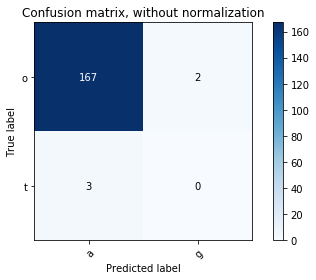

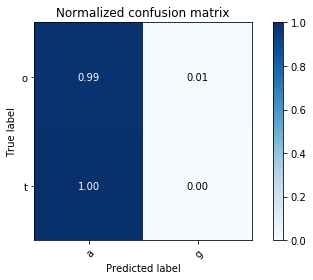

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix



#def plot_confusion_matrix(y_test, y_pred_DT, classes,
def plot_confusion_matrix(y_test, y_pred_DT,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    #cm = confusion_matrix(y_true, y_pred)
    cm = np.array([[171,1], [0,0]])
    #cm = np.array([[167,2],[3,0]])
     

    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_test, y_predict_DT)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           #xticklabels=classes, yticklabels=classes,
           xticklabels="agr", yticklabels="other",
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plot_confusion_matrix(y_test, y_predict_DT, classes=class_names,
#                      title='Confusion matrix, without normalization')
plot_confusion_matrix(y_test, y_predict_DT,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plot_confusion_matrix(y_test, y_predict_DT, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')
plot_confusion_matrix(y_test, y_predict_DT, normalize=True,
                      title='Normalized confusion matrix')



plt.show()


In [0]:
#Plotting a confusion matrix


Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()





In [0]:
#EXPERIMENT 2
# Plot learning curves
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    train_errors, test_errors = [], []
   # change de len for m in range(1, len(x_train)):
    for m in range(1, 5):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_test_predict = model.predict(x_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_predict, y_test))
        plt.plot(train_errors, "r-+", linewidth = 2, label = "Training Data")
        plt.plot(test_errors, "b-+", linewidth = 3, label = "Test Data")
        plt.ylabel("Mean squared error")
        plt.title("Learning Curves")
        plt.legend()
        
linear_reg_model = linear_model.LinearRegression()
plot_learning_curves(linear_reg_model, x_real, y_real)

In [0]:
tree_giniIndex
from sklearn import linear_model
from sklearn.metrics import coverage_error
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, test_errors = [], []
    for m in range(1, 1280, 30):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_predict, y_test))
        plt.plot(train_errors, "r-", linewidth = 1)
        plt.plot(test_errors, "b-", linewidth = 1)
        plt.ylabel('Mean squared error')
        plt.title('Linear_Learning Curves')
        plt.ylim(0, 5)

linear_reg_model = linear_model.LinearRegression()
plot_learning_curves(linear_reg_model, X, y_withNoise)

In [0]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    train_errors, test_errors = [], []
    for m in range(1, 570, 10):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(f1_score(y_train_predict, y_train[:m], average="weighted"))
        test_errors.append(f1_score(y_test_predict, y_test,  average="weighted"))
        plt.plot(train_errors, "r-", linewidth = 1)
        plt.plot(test_errors, "b-", linewidth = 1)
        plt.ylabel('f1_score')
        plt.title('Tree_giniIndex_Learning Curves')
        plt.ylim(0, 2)

tree_giniIndex = ClassifierChain(DecisionTreeClassifier(criterion='entropy', max_depth=15, class_weight="balanced"))
plot_learning_curves(tree_giniIndex, X, y)

In [0]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    train_errors, test_errors = [], []
    for m in range(1, 570, 10):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(f1_score(y_train_predict, y_train[:m], average="weighted"))
        test_errors.append(f1_score(y_test_predict, y_test,  average="weighted"))
        plt.plot(train_errors, "r-", linewidth = 1)
        plt.plot(test_errors, "b-", linewidth = 1)
        plt.ylabel('f1_score')
        plt.title('Tree_giniIndex_Learning Curves')
        plt.ylim(0, 2)

tree_giniIndex = ClassifierChain(DecisionTreeClassifier(criterion='entropy', max_depth=15, class_weight="balanced"))
plot_learning_curves(tree_giniIndex, X, y)

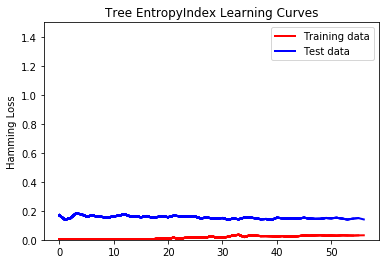

In [205]:
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import label_ranking_loss
from sklearn.metrics import hamming_loss

import matplotlib.pyplot as plt


def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train)
    X_test_norm = mms.transform(X_test)
    train_errors, test_errors = [], []
    for m in range(1, 570, 10):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train_norm[:m])
        y_test_predict = model.predict(X_test_norm)
        train_errors.append(hamming_loss(y_train_predict, y_train[:m]))
        test_errors.append(hamming_loss(y_test_predict, y_test))           
        plt.plot(train_errors, "r-", label="Training data", linewidth = 2)
        plt.plot(test_errors, "b-", linewidth = 2, label="Test data")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.legend(["Training data","Test data"])
        plt.ylabel('Hamming Loss')
        plt.title('Tree EntropyIndex Learning Curves')
        plt.ylim(0, 1.5)

tree_giniIndex = ClassifierChain(DecisionTreeClassifier(criterion='entropy', max_depth=15))
plot_learning_curves(tree_giniIndex, X, y)


                     

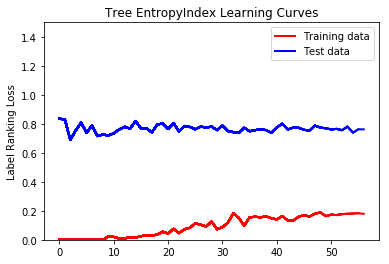

In [206]:
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train)
    X_test_norm = mms.transform(X_test)
    train_errors, test_errors = [], []
    for m in range(1, 570, 10):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train_norm[:m])
        y_test_predict = model.predict(X_test_norm)
        train_errors.append(label_ranking_loss(y_train_predict, y_train[:m]))
        test_errors.append(label_ranking_loss(y_test_predict, y_test))
        plt.plot(train_errors, "r-", label="Training data", linewidth = 2)
        plt.plot(test_errors, "b-", linewidth = 2, label="Test data")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.legend(["Training data","Test data"])
        plt.ylabel('Label Ranking Loss')
        plt.title('Tree EntropyIndex Learning Curves')
        plt.ylim(0, 1.5)

tree_giniIndex = ClassifierChain(DecisionTreeClassifier(criterion='entropy', max_depth=15))
plot_learning_curves(tree_giniIndex, X, y)

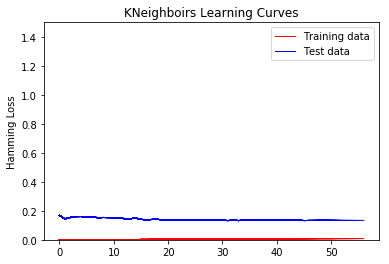

In [208]:
#LEarning curve for KNeighboirs


#b) KneighborsClassifier
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


#normalization

from sklearn.preprocessing import MinMaxScaler



from skmultilearn.problem_transform import ClassifierChain
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import label_ranking_loss
#from sklearn.metrics import hamming_loss

import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train)
    X_test_norm = mms.transform(X_test)
    train_errors, test_errors = [], []
    for m in range(1, 570, 10):
        model.fit(X_train_norm[:m], y_train[:m])
        y_train_predict = model.predict(X_train_norm[:m])
        y_test_predict = model.predict(X_test)
        #train_errors.append(label_ranking_loss(y_train_predict, y_train[:m]))
        train_errors.append(hamming_loss(y_train_predict, y_train[:m]))
        #test_errors.append(label_ranking_loss(y_test_predict, y_test))
        test_errors.append(hamming_loss(y_test_predict, y_test))
        plt.plot(train_errors, "r-", linewidth = 1)
        plt.plot(test_errors, "b-", linewidth = 1)
        plt.legend(["Training data","Test data"])
        plt.ylabel('Hamming Loss')
        plt.title('KNeighboirs Learning Curves')
        plt.ylim(0, 1.5)

Knclassifier = ClassifierChain(KNeighborsClassifier(n_neighbors=1, p =1))
plot_learning_curves(Knclassifier, X, y)

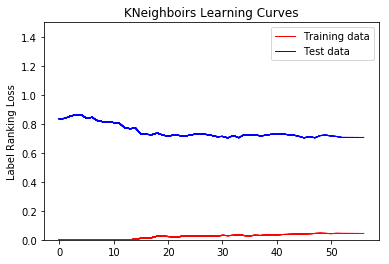

In [209]:
#LEarning curve for KNeighboirs


#b) KneighborsClassifier
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


#normalization

from sklearn.preprocessing import MinMaxScaler



from skmultilearn.problem_transform import ClassifierChain
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import label_ranking_loss
#from sklearn.metrics import hamming_loss

import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train)
    X_test_norm = mms.transform(X_test)
    train_errors, test_errors = [], []
    for m in range(1, 570, 10):
        model.fit(X_train_norm[:m], y_train[:m])
        y_train_predict = model.predict(X_train_norm[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(label_ranking_loss(y_train_predict, y_train[:m]))
        test_errors.append(label_ranking_loss(y_test_predict, y_test))
        plt.plot(train_errors, "r-", linewidth = 1)
        plt.plot(test_errors, "b-", linewidth = 1)
        plt.legend(["Training data","Test data"])
        plt.ylabel('Label Ranking Loss')
        plt.title('KNeighboirs Learning Curves')
        plt.ylim(0, 1.5)

Knclassifier = ClassifierChain(KNeighborsClassifier(n_neighbors=1, p =1))
plot_learning_curves(Knclassifier, X, y)

In [59]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import label_ranking_average_precision_score
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    train_errors, test_errors = [], []
    for m in range(1, 570, 10):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(label_ranking_average_precision_score(y_train_predict, y_train[:m]))
        test_errors.append(label_ranking_average_precision_score(y_test_predict, y_test))
        plt.plot(train_errors, "r-", linewidth = 1)
        plt.plot(test_errors, "b-", linewidth = 1)
        plt.ylabel('label_ranking_average_precision_score')
        plt.title('Tree_giniIndex_Learning Curves')
        plt.ylim(0, 2)

tree_giniIndex = ClassifierChain(DecisionTreeClassifier(criterion='entropy', max_depth=15, class_weight="balanced"))
plot_learning_curves(tree_giniIndex, X, y)

TypeError: ignored

In [0]:
#b) KneighborsClassifier
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
Knclassifier = ClassifierChain(KNeighborsClassifier())

# train
Knclassifier.fit(X_train, y_train)

# predict
y_predict_KN = Knclassifier.predict(X_test)

accuracy_KN= accuracy_score(y_test,y_predict_KN)

print(accuracy_KN)

In [0]:
#Using skmultilearn

from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=20)

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

In [0]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Cross-validation score:
[0.16 0.26 0.2  0.23 0.12 0.16 0.19 0.25 0.19 0.19]
Average cross-validation score: 0.20
Standard deviation: 0.04
Score for depth of 1on validation set is 0.04


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Score for depth of 2on validation set is 0.14
Score for depth of 3on validation set is 0.12


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Score for depth of 4on validation set is 0.13
Score for depth of 5on validation set is 0.17


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Score for depth of 6on validation set is 0.18
Score for depth of 7on validation set is 0.20


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Score for depth of 8on validation set is 0.22
Score for depth of 9on validation set is 0.22


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Score for depth of 11on validation set is 0.23
Score for depth of 13on validation set is 0.25


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Score for depth of 15on validation set is 0.25
Score for depth of 17on validation set is 0.25


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Score for depth of 18on validation set is 0.26
Score for depth of 19on validation set is 0.26
Best score on cross-validation: 0.26
Best parameters: {'max_depth': 18}
Test set score: 0.16


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

In [0]:
#EXPERIMENT 1 (EDIT DATASET AND TO MULTILABEL)


# b) Nearest Neighbors (K-NN)
# Normalize data
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

# Tune hyperparameters using cross-validation for K-NN


#b) KneighborsClassifier
# using classifier chains
#from skmultilearn.problem_transform import ClassifierChain
#from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=2)

best_score = 0

for p in [1, 2, 3, 4, 5]:
    for n in [1, 2, 3, 4, 5, 6]:   
        #clf = ClassifierChain(KNeighborsClassifier(n_neighbors=n, p=p, metric='minkowski'))
        #clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=n, p=p, metric='minkowski'))
        clf = LabelPowerset(KNeighborsClassifier(n_neighbors=n, p=p, metric='minkowski'))
        clf.fit(X_train_norm, y_train)
            
        fold_accuracies = cross_val_score(clf, X_train, y_train, cv=kfold, scoring="accuracy")  
        score = fold_accuracies.mean()
        print("Score for p " + str(p) + ", score of neighbors " + str(n) + " on validation set is {:0.2f}".format(score))
    
        if score > best_score:
            best_param = {"p": p, "neighbors": n}
            best_score = score

#rebuild the model and evaluate the test score                
clf = KNeighborsClassifier(**best_param)
clf.fit(X_train_norm, y_train)
test_score = clf.score(X_test_norm, y_test)
print("Best score on cross-validation: {:0.2f}".format(best_score))
print("Best parameters: {}".format(best_param))
print("Test set score: {:.2f}".format(test_score))
